In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv("breast-cancer-wisconsin.data",header=None)
df.columns = ['SampleCodeNumber','ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion','SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']

In [2]:
len(df)

699

In [3]:
df.head()

,SampleCodeNumber,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df_modified = df
for col in df_modified.columns:
    df_modified[col].replace({'?':'1'}, inplace=True)
len(df_modified)

699

In [5]:
X = np.asarray(df_modified[['ClumpThickness','UniformityOfCellSize','UniformityOfCellShape','MarginalAdhesion'
                         ,'SingleEpithelialCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses']])
Y = np.asarray(df_modified[['Class']])
Y = Y.ravel()
X = preprocessing.StandardScaler().fit(X).transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35)

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train,Y_train)
Y_predict = svm.predict(X_test)

SVM's Accuracy:  0.9591836734693877


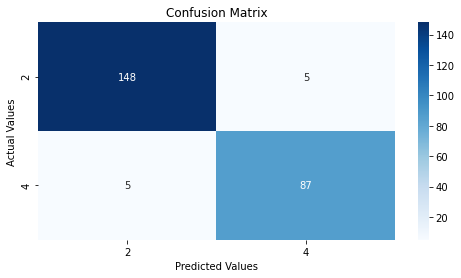

In [7]:
cm = metrics.confusion_matrix(Y_test,Y_predict)
plt.figure(figsize=(8,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["2","4"], yticklabels=["2","4"])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
print("SVM's Accuracy: ", metrics.accuracy_score(Y_test, Y_predict))